# $\epsilon$-Greedy

## Overview
- **Advantage**: Simple and easy to understand. Compared to random policy, it makes better use of observations. 
- **Disadvantage**:  It is difficult to determine an ideal $\epsilon$: if $\epsilon$ is large, exploration will dominate; otherwise, eploitation will dominate. To address this issue, we offer a more adaptive version—$\epsilon_t$-greedy, where $\epsilon_t$ decreases as $t$ increases.
- **Application Situation**: discrete action space, binary/Gaussian reward space

## Main Idea
$\epsilon$-Greedy is an intuitive algorithm to incorporate the exploration and exploitation. It is simple and widely used [1]. Specifically, at each round $t$, we will select a random action with probability $\epsilon$, and select an action with the highest estimated mean potential reward, $\theta_a$, for each arm $a$ based on the history so far with probability $1-\epsilon$. Specifically,
$$
\begin{aligned}
\theta_a = \hat{E}(R_t(a)|\{A_t, R_t\})
\end{aligned}
$$

For example, in movie recommendation, the agent would either recommend a random genere of movies to the user or recommend the genere that the user watched the most in the past. Here the parameter $\epsilon$ is pre-specified. A more adaptive variant is $\epsilon_{t}$-greedy, where the probability of taking a random action is defined as a decreasing function of $t$. Auer et al. [2] showed that $\epsilon_{t}$-greedy performs well in practice with $\epsilon_{t}$ decreases to 0 at a rate of $\frac{1}{t}$. Note that, the reward can be either binary or continuous.


## Algorithms Details
Supposed there are $K$ options, and the action space is $\mathcal{A} = \{0,1,\cdots, K-1\}$. The $\epsilon$-greedy algorithm start with initializing the estimated values $\theta_a^0$ and the count of being pulled $C_a^0$ for each action $a$ as 0. At each round $t$, we either take an action with the maximum estimated value $\theta_a$ with probability $1-\epsilon_{t}$ or randomly select an action with probability $\epsilon_t$. After observing the rewards corresponding to the selected action $A_t$, we updated the total number of being pulled for $A_t$, and estimated the $\theta_{A_{t}}$ by with the sample average for $A_t$.

Remark that both the time-adaptive and the time-fixed version of $\epsilon$-greedy algorithm are provided. By setting **decrease_eps=True**, the $\epsilon_{t}$ in round $t$ is calculated as $\frac{K}{T}$. Otherwise, $\epsilon_{t}$ is a fixed value specfied by users.

## Key Steps

1. Initializing the $\boldsymbol{\theta}^0$ and $\boldsymbol{C}^0$ for $K$ items as 0
2. For t = $0, 1,\cdots, T$:

    2.1. select action $A_t$ as the arm with the maximum $\theta_a^t$ with probability $1-\epsilon_t$, or randomly select an action $A_t$ with probability $\epsilon_t$
    
    2.2. Received the reward $R_t$, and update $C$ and $Q$ with
    \begin{align}
    C_{A_{t}}^{t+1} &= C_{A_{t}}^{t} + 1 \\
    \theta_{A_{t}}^{t+1} &=\theta_{A_{t}}^{t} + \frac{1}{C_{A_{t+1}}^{t+1}}*(R_t-\theta_{A_{t}}^{t})
    \end{align}

## Demo Code

In [4]:
# After we publish the pack age, we can directly import it
# TODO: explore more efficient way
# we can hide this cell later
import os
os.getcwd()
os.chdir('/nas/longleaf/home/lge/CausalDM')
# code used to import the learner

In [5]:
from causaldm.learners.Online.Single import Epsilon_Greedy
from causaldm.learners.Online.Single import _env
import numpy as np

In [6]:
T = 2000
K = 5

phi_beta = 1/4
with_intercept = True
p=3
X_mu = np.zeros(p-1)
X_sigma = np.identity(p-1)
Sigma_theta = sigma_gamma = np.identity(p)
mu_theta = np.zeros(p)
seed = 0

env = _env.Single_Gaussian_Env(T, K, p, phi_beta
                         , mu_theta, Sigma_theta
                        , seed, with_intercept = True
                         , X_mu = X_mu, X_sigma = X_sigma)
#time-adaptive. for time-fixed version, specifiying epsilon and setting decrease_eps=False
greedy_agent = Epsilon_Greedy.Epsilon_Greedy(K, epsilon = None, decrease_eps = True)
A = greedy_agent.take_action()
t = 0
R = env.get_reward(t,A)
greedy_agent.receive_reward(t,A,R)

In [7]:
greedy_agent.cnts

array([0., 0., 0., 1., 0.])

**Interpretation:** A sentence to include the analysis result: the estimated optimal regime is...

In [3]:
import os
os.getcwd()
os.chdir('/nas/longleaf/home/lge/CausalDM')
# code used to import the learner
from causaldm.learners.Online.Single import _env
from causaldm.learners.Online.Single import _Experiment
from causaldm.learners.Online.Single import Epsilon_Greedy
from causaldm.learners.Online.Single import UCB1
from causaldm.learners.Online.Single import TS
from causaldm.learners.Online.Single import LinTS
from causaldm.learners.Online.Single import LinUCB
import numpy as np

In [27]:
T = 2000
K = 500

phi_beta = sigma = 1/4
with_intercept = True
p=3
X_mu = np.zeros(p-1)
X_sigma = np.identity(p-1)
Sigma_theta = sigma_gamma = np.identity(p)
mu_theta = np.zeros(p)
seed = 0

exp = _Experiment.Experiment(T, K, p, sigma
                         , mu_theta, Sigma_theta
                        , seed, with_intercept = True
                         , X_mu = X_mu, X_sigma = X_sigma, Gaussian = True)

In [28]:
r = exp.env.r
greedy_agent = Epsilon_Greedy.Epsilon_Greedy(K, epsilon = .6, decrease_eps = False)
UCB_agent = UCB1.UCB1(K)
TS_Bernoulli_agent = TS.TS(Reward_Type = "Gaussian", sigma = sigma, u_prior_mean = np.ones(K)*.5, u_prior_cov = np.identity(K), prior_phi_beta = sigma)
LinTS_agent = LinTS.LinTS_Gaussian(sigma = sigma, prior_theta_u = np.ones(p), prior_theta_cov = np.identity(p), K = K, p = p, seed = seed)
LinUCB_agent = LinUCB.LinUCB_Gaussian(alpha = .5, K = K, p = p, seed = seed)

agents = {"greedy" : greedy_agent, 'UCB':UCB_agent, 'TS': TS_Bernoulli_agent, 'LinTS':LinTS_agent, 'LinUCB':LinUCB_agent}
exp._init_agents(agents)
exp.run()

LinUCB: 100%|██████████| 2000/2000 [00:00<00:00, 3878.14it/s]


In [29]:
R_greedy = exp.record['R']['greedy']
R_oracle = exp.record['R']['oracle']
R_TS = exp.record['R']['TS']
R_UCB = exp.record['R']['UCB']
R_LinTS = exp.record['R']['LinTS']
R_LinUCB = exp.record['R']['LinUCB']

In [30]:
opt_r = exp.env.r[exp.env.optimal_arm]
Reward_greedy = (np.cumsum(opt_r-R_greedy))/np.arange(1, len(R_greedy)+1)
Reward_TS = (np.cumsum(opt_r-R_TS))/np.arange(1, len(R_greedy)+1)
Reward_UCB = (np.cumsum(opt_r-R_UCB))/np.arange(1, len(R_greedy)+1)
Reward_LinTS = (np.cumsum(opt_r-R_LinTS))/np.arange(1, len(R_greedy)+1)
Reward_LinUCB = (np.cumsum(opt_r-R_LinUCB))/np.arange(1, len(R_greedy)+1)
Reward_oracle = (np.cumsum(opt_r-R_oracle))/np.arange(1, len(R_greedy)+1)

In [31]:
LinTS_agent.u

array([-2.2903,  1.4224,  0.9699])

In [32]:
LinUCB_agent.Cov_inv

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [33]:
        x = exp.env.Phi[0]
        Ax = np.matmul(LinUCB_agent.Cov_inv,x)
        xAx = x.dot(Ax)
        LinUCB_agent.Cov_inv -= Ax.dot(Ax.T)/(1+xAx)

In [41]:
from numpy.linalg import norm, inv
inv(LinUCB_agent.Cov)

array([[8.3083e+14, 1.3556e+15, 1.3801e+15],
       [1.3556e+15, 2.2119e+15, 2.2518e+15],
       [1.3801e+15, 2.2518e+15, 2.2925e+15]])

In [35]:
exp.env.theta

array([1.7641, 0.4002, 0.9787])

In [36]:
Reward_LinUCB

array([3.9901, 3.5788, 3.4776, ..., 1.6803, 1.6803, 1.6805])

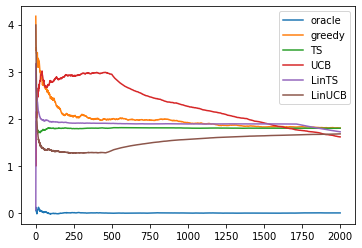

In [37]:
import matplotlib.pyplot as plt
plt.plot(Reward_oracle,label = 'oracle')
plt.plot(Reward_greedy,label = 'greedy')
plt.plot(Reward_TS,label = 'TS')
plt.plot(Reward_UCB,label = 'UCB')
plt.plot(Reward_LinTS,label = 'LinTS')
plt.plot(Reward_LinUCB,label = 'LinUCB')
plt.legend()
plt.show()

## References

[1] Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT press.

[2] Auer, P., Cesa-Bianchi, N., & Fischer, P. (2002). Finite-time analysis of the multiarmed bandit problem. Machine learning, 47(2), 235-256.